# The Physics Vector Module
Documentation Link: https://docs.sympy.org/latest/modules/physics/vector/index.html

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

import sympy.physics.vector as spvec
spvec.init_vprinting(pretty_print=True)

In [2]:
from IPython.display import Image

## Vector and ReferenceFrame
Link: https://docs.sympy.org/latest/modules/physics/vector/vectors.html#vector

In [3]:
N = spvec.ReferenceFrame('N')
display(N.x, N.y, N.z)
display(N.x==N.x, N.x==N.y, N.x +2*N.y)

True

False

### [Vector Algebra](https://docs.sympy.org/latest/modules/physics/vector/vectors.html#vector-algebra-in-physics-vector)

In [4]:
x = sp.symbols('x')

In [5]:
x*(N.x +5*N.y -2*N.z)

In [6]:
display(N.x.dot(N.x), N.x.dot(N.y), spvec.dot(N.y, N.y))
display(N.x.cross(N.x), N.x.cross(N.z), spvec.cross(N.y, N.z)==N.x)


True

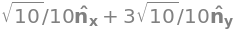

In [7]:
display((N.x +3*N.y).normalize(), (N.x -N.z).magnitude())

**Vector to Matrix**

In [8]:
vec1 = x*N.x +5*N.y -2*N.z
display(vec1, vec1.to_matrix(N))

⎡x ⎤
⎢  ⎥
⎢5 ⎥
⎢  ⎥
⎣-2⎦

### [Vector Calculus](https://docs.sympy.org/latest/modules/physics/vector/vectors.html#vector-calculus-in-physics-vector)

In [9]:
vec2 = x**2*N.x -2*x*N.y +5*N.z
display(vec2, vec2.diff(x, N))

In [10]:
A = spvec.ReferenceFrame('A')
A.x + N.x

No relationship is defined.

In [11]:
A.orient(N, 'Axis', [x, N.y])

Now, the orientation of $A$ is defined.

In [12]:
display(N.dcm(A), A.dcm(N), A.dcm(A))

⎡cos(x)   0  sin(x)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(x)  0  cos(x)⎦

⎡cos(x)  0  -sin(x)⎤
⎢                  ⎥
⎢  0     1     0   ⎥
⎢                  ⎥
⎣sin(x)  0  cos(x) ⎦

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [13]:
N = spvec.ReferenceFrame('N')
Bp = spvec.ReferenceFrame('Bp')
Bpp = spvec.ReferenceFrame('Bpp')
B = spvec.ReferenceFrame('B')

q1, q2, q3 = sp.symbols('q1 q2 q3')

Bpp.orient(N,'Axis', [q1, N.x])
Bp.orient(Bpp,'Axis', [q2, Bpp.y])
B.orient(Bp,'Axis', [q3, Bp.z])
display(N.dcm(B))
B.orient(N,'Body',[q1,q2,q3],'XYZ')
display(N.dcm(B))

C = N.orientnew('C', 'Axis', [q1, N.x])

⎡             cos(q₂)⋅cos(q₃)                            -sin(q₃)⋅cos(q₂)     
⎢                                                                             
⎢sin(q₁)⋅sin(q₂)⋅cos(q₃) + sin(q₃)⋅cos(q₁)  -sin(q₁)⋅sin(q₂)⋅sin(q₃) + cos(q₁)
⎢                                                                             
⎣sin(q₁)⋅sin(q₃) - sin(q₂)⋅cos(q₁)⋅cos(q₃)  sin(q₁)⋅cos(q₃) + sin(q₂)⋅sin(q₃)⋅

              sin(q₂)     ⎤
                          ⎥
⋅cos(q₃)  -sin(q₁)⋅cos(q₂)⎥
                          ⎥
cos(q₁)   cos(q₁)⋅cos(q₂) ⎦

⎡             cos(q₂)⋅cos(q₃)                            -sin(q₃)⋅cos(q₂)     
⎢                                                                             
⎢sin(q₁)⋅sin(q₂)⋅cos(q₃) + sin(q₃)⋅cos(q₁)  -sin(q₁)⋅sin(q₂)⋅sin(q₃) + cos(q₁)
⎢                                                                             
⎣sin(q₁)⋅sin(q₃) - sin(q₂)⋅cos(q₁)⋅cos(q₃)  sin(q₁)⋅cos(q₃) + sin(q₂)⋅sin(q₃)⋅

              sin(q₂)     ⎤
                          ⎥
⋅cos(q₃)  -sin(q₁)⋅cos(q₂)⎥
                          ⎥
cos(q₁)   cos(q₁)⋅cos(q₂) ⎦

In [14]:
q1, q2, q3 = spvec.dynamicsymbols('q1 q2 q3')
t = sp.symbols('t')
display(q1, sp.diff(q1, t))
spvec.vprint(sp.diff(q1, t))

q1'


### Printing

In [15]:
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=False)
q1.diff(t)

q1'

In [16]:
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=True)
q1.diff(t)

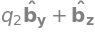

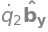

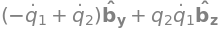

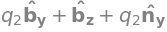

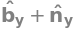

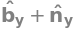

In [17]:
B = N.orientnew('B', 'Axis', [q1, N.x])

vec1 = B.y*q2 +B.z
display(vec1, vec1.diff(q2, N), vec1.dt(B), vec1.dt(N))
vec2 = B.y*q2 + B.z + N.y*q2
display(vec2, vec2.diff(q2, N), vec2.diff(q2, B))

## Kinematics
Link: https://docs.sympy.org/latest/modules/physics/vector/kinematics.html

In [18]:
spvec.init_vprinting(pretty_print=True)

In [19]:
N = spvec.ReferenceFrame('N')
q1 = spvec.dynamicsymbols('q1')

A = N.orientnew('A', 'Axis', [q1, N.x])

display(A.ang_vel_in(N))

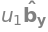

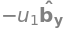

In [20]:
B = spvec.ReferenceFrame('B')
u1 = spvec.dynamicsymbols('u1')
B.set_ang_vel(N, u1*B.y)
display(B.ang_vel_in(N), N.ang_vel_in(B))

Multiple bodies with angular velocities defined relative to each other.

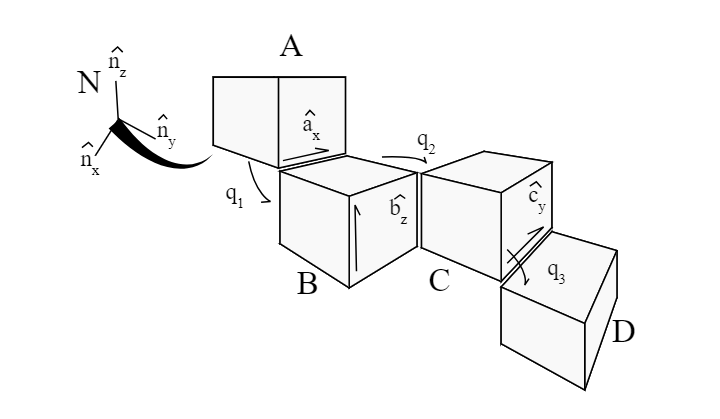

In [21]:
Image(filename='images_doc/kinematics1.png')

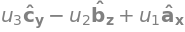

In [22]:
N = spvec.ReferenceFrame('N')
A = spvec.ReferenceFrame('A')
B = spvec.ReferenceFrame('B')
C = spvec.ReferenceFrame('C')
D = spvec.ReferenceFrame('D')
u1, u2, u3 = spvec.dynamicsymbols('u1 u2 u3')
A.set_ang_vel(N, 0)
B.set_ang_vel(A, u1*A.x)
C.set_ang_vel(B, -u2*B.z)
D.set_ang_vel(C, u3*C.y)
display(A.ang_vel_in(N), D.ang_vel_in(N))

Point:

In [23]:
O = spvec.Point('O')
P = O.locatenew('P', 3*N.x +N.y)
display(P.pos_from(O))
Q = spvec.Point('Q')
Q.set_pos(P, N.z)
display(Q.pos_from(P), Q.pos_from(O))

In [24]:
O.set_vel(N, u1*N.x)
display(O.vel(N), O.acc(N))
O.set_acc(N, u2*u1*N.y)
display(O.acc(N))

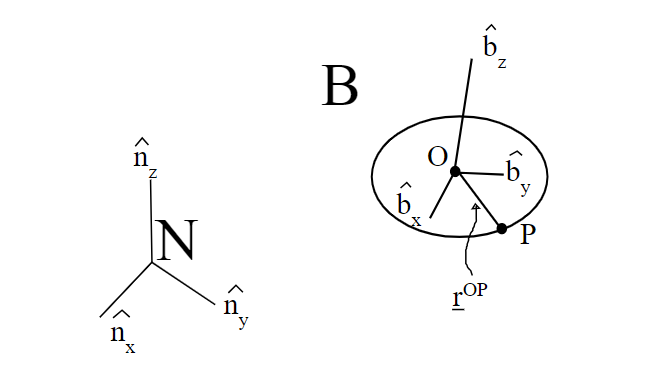

In [25]:
Image(filename='images_doc/kinematics2.png')

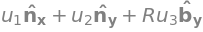

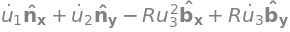

In [26]:
N = spvec.ReferenceFrame('N')
u1, u2, u3 = spvec.dynamicsymbols('u1 u2 u3')
R = sp.Symbol('R')
B = spvec.ReferenceFrame('B')
O = spvec.Point('O')
O.set_vel(N, u1*N.x +u2*N.y)
P = O.locatenew('P', R*B.x)
B.set_ang_vel(N, u3*B.z)

display(P.v2pt_theory(O,N,B), P.a2pt_theory(O,N,B))

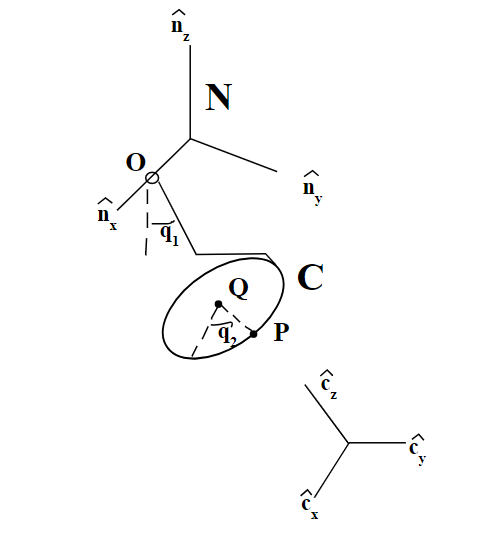

In [27]:
Image(filename='images_doc/kinematics3.png')

Particle moving on a ring

In [28]:
N = spvec.ReferenceFrame('N')
u1, u2 = spvec.dynamicsymbols('u1 u2')
q1, q2 = spvec.dynamicsymbols('q1 q2')
l, R = sp.symbols('l R')
C = N.orientnew('C', 'Axis', [q1, N.x])
C.set_ang_vel(N, u1*N.x)
O = spvec.Point('O')
O.set_vel(N, 0)
Q = O.locatenew('Q', -l*C.z)
P = Q.locatenew('P', R*(sp.cos(q2)*C.x +sp.sin(q2)*C.y))
P.set_vel(C, R*u2*(-sp.sin(q2)*C.x +sp.cos(q2)*C.y))

display(Q.v2pt_theory(O,N,C), P.v1pt_theory(Q,N,C))

## Potential Issues/Advanced Topics/Future Features in Physics/Vector Module
Link: https://docs.sympy.org/latest/modules/physics/vector/advanced.html

### Inertia (Dyadics)

In [29]:
import sympy.physics.mechanics as spmech

N = spmech.ReferenceFrame('N')

In [30]:
I1 = spmech.inertia(N,1,2,3)
I2 = spmech.inertia(N,1,2,3,4,5,6)
display(I1, I1.to_matrix(N), I2, I2.to_matrix(N))

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

⎡1  4  6⎤
⎢       ⎥
⎢4  2  5⎥
⎢       ⎥
⎣6  5  3⎦

### Advanced Interfaces

**`ReferenceFrame`**

In [32]:
N = spvec.ReferenceFrame('N', indices=['i','j','k'])
display(N['i'], N.x)

In [33]:
N = spvec.ReferenceFrame('N', latexs=['n_1', '\eta_2', 'n3'])
display(N.x, N.y, N.z)

**`dynamicsymbols`**

In [51]:
q1 = spvec.dynamicsymbols('q1')
display(q1)
spvec.dynamicsymbols._t = sp.symbols('T')
display(q1)
q2 = spvec.dynamicsymbols('q2')
display(q2)
q1d = spvec.dynamicsymbols('q1', 1)
spvec.vprint(q1d)
spvec.dynamicsymbols._str = 'd'
spvec.vprint(q1d)
spvec.dynamicsymbols._str = '\''
spvec.dynamicsymbols._t = sp.symbols('t')

q1'
q1d


## Scalar and Vector Field Functionality
Link: https://docs.sympy.org/latest/modules/physics/vector/fields.html

In [54]:
import sympy.physics.vector as spvec

R = spvec.ReferenceFrame('R')

### [Fields](https://docs.sympy.org/latest/modules/physics/vector/fields.html#implementation-of-fields-in-sympy-physics-vector)

In [60]:
v1 = 3*R.x +4*R.y +5*R.z
display(v1, R[0])

el_pot = 2*R[0]**2 *R[1]
display(el_pot, sp.diff(el_pot, R[0]))
q = spvec.dynamicsymbols('q')
R1 = R.orientnew('R1', 'Axis', [q, R.z])
expr_pot = spvec.express(el_pot, R1, variables=True)
display('express', expr_pot)

dVdt = spvec.time_derivative(el_pot, R)
dVdt1 = spvec.time_derivative(el_pot, R1)
display('time_derivative', dVdt, dVdt1, dVdt1.simplify())

'express'

'time_derivative'

### [Field operators and other related functions](https://docs.sympy.org/latest/modules/physics/vector/fields.html#field-operators-and-other-related-functions)

In [ ]:
R = spvec.ReferenceFrame('R')

#### **Curl**
3D Cartesian system:
$$ \nabla \times \mathbf{F} = \left(\frac{\partial F_z}{\partial y}  -
\frac{\partial F_y}{\partial z}\right) \mathbf{\hat{i}} +
\left(\frac{\partial F_x}{\partial z} -
\frac{\partial F_z}{\partial x}\right) \mathbf{\hat{j}} +
\left(\frac{\partial F_y}{\partial x} -
\frac{\partial F_x}{\partial y}\right) \mathbf{\hat{k}} $$

In [61]:
fld = R[0]*R[1]*R[2]*R.x
curlf = spvec.curl(fld, R)
display(fld, curlf)

#### **Divergence**
3D Cartesian system:
$$ \nabla\cdot\mathbf{F} =\frac{\partial F_x}{\partial x}
+\frac{\partial F_y}{\partial y}
+\frac{\partial F_z}{\partial z
} $$

In [62]:
fld = R[0]*R[1]*R[2] *(R.x+R.y+R.z)
divf = spvec.divergence(fld, R)
display(fld, divf)

#### **Gradient**
3D Cartesian system:
$$ \nabla f = \frac{\partial f}{\partial x} \mathbf{\hat{i}} +
\frac{\partial f}{\partial y}  \mathbf{\hat{j}} +
\frac{\partial f}{\partial z} \mathbf{\hat{k}} $$

In [63]:
fld = R[0]*R[1]*R[2]
gradf = spvec.gradient(fld, R)
display(fld, gradf)

#### **Conservative and Solenoidal fields**

In [67]:
fld = R[1]*R[2]*R.x + R[0]*R[2]*R.y + R[0]*R[1]*R.z
curlf = spvec.curl(fld, R)
display(fld, curlf, spvec.is_conservative(fld))

True

In [68]:
fld = R[1]*R[2]*R.x + R[0]*R[2]*R.y + R[0]*R[1]*R.z
divf = spvec.divergence(fld, R)
display(fld, divf, spvec.is_solenoidal(fld))

True

#### **Scalar potential functions**

In [70]:
cons_fld = 4*R[0]*R[1]*R[2]*R.x + 2*R[0]**2*R[2]*R.y + 2*R[0]**2*R[1]*R.z
display(cons_fld, spvec.is_conservative(cons_fld))
scalar_pot = spvec.scalar_potential(cons_fld, R)
display(scalar_pot)

True

In [74]:
O = spvec.Point('O')
P = O.locatenew('P', R.x +2*R.y +3*R.z)
vec_fld = 4*R[0]*R[1]*R.x + 2*R[0]**2*R.y
pot_diff = spvec.scalar_potential_difference(vec_fld, R, O, P, O)
display(vec_fld, pot_diff)

## Physics Vector API
Link: https://docs.sympy.org/latest/modules/physics/vector/api/index.html